In [39]:
import astropy
import numpy as np
import matplotlib
import pandas as pd
import scipy

from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter 

In [2]:
plt.rcParams['figure.figsize'] = (12, 9)

In [3]:
file = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/MW_foreground_SMC.fits')

In [4]:
FUSE = pd.read_csv('/Users/FRANNYPACK/Downloads/grind!/research/Data/FUSE_info (SMC + LMC).csv')
FUSE = FUSE[(FUSE["DEC_FK5"] < -69) & (FUSE["RA_FK5"] < 28)] # relevant stars in SMC

In [6]:
FUSE

Target     RA_FK5    DEC_FK5 Galaxy    SpecType  \
103                   AV104  12.910521 -72.801528    SMC      B0.5Ia   
104                   SK159  18.995167 -73.356694    SMC     B0.5Iaw   
105                   AV304  15.589292 -72.654067    SMC       B0.5V   
106                 SMC-X-1  19.271667 -73.443306    SMC         B0I   
107                   AV215  14.731708 -72.535583    SMC        B0Ia   
108                    SK82  14.940500 -72.748917    SMC        B0Iw   
110                   AV216  14.746588 -72.742706    SMC       B1III   
111                   AV266  15.289125 -72.457833    SMC       B1III   
112                   AV506  20.546500 -73.447722    SMC         B1V   
113  OGLE005100.18-725303.9  12.750750 -72.884417    SMC         B2V   
114                    AV14  11.636083 -73.101556    SMC       O3-4V   
115                NGC346-3  14.754542 -72.174500    SMC    O3III(f)   
116                NGC346-1  14.770042 -72.173556    SMC    O4III(f)   
117                   AV476  18.426667 -73.291556    SMC   O4III(f*)   
118                   AV435  17.074500 -71.998417    SMC         O4V   
119                NGC346-4  14.751625 -72.177194    SMC       O5-6V   
120                    AV75  12.635417 -72.876722    SMC       O5III   
121                    AV61  12.507375 -72.190556    SMC         O5V   
122                   AV220  14.792108 -72.096689    SMC     O6.5?fp   
123                   SK108  15.855167 -72.112028    SMC   O6.5n+WN3   
124                   AV446  17.356083 -73.158250    SMC       O6.5V   
125                   AV243  15.028333 -72.788611    SMC         O6V   
126                   AV377  16.280542 -72.805083    SMC         O6V   
127                    AV83  12.716708 -72.704028    SMC       O7.5I   
128                    AV95  12.840208 -72.737333    SMC     O7.5III   
129                   AV491  19.320042 -73.166972    SMC     O7.5III   
130                    SK80  14.883125 -72.179389    SMC      O7Iaf+   
131                    AV15  11.675792 -73.415194    SMC        O7II   
132                    AV26  11.958625 -73.139083    SMC       O7III   
133                    AV69  12.572500 -72.891639    SMC       O7III   
134                    AV80  12.682917 -72.794667    SMC       O7III   
135                   AV135  13.206333 -72.140722    SMC       O7III   
136                   AV207  14.638292 -71.929583    SMC         O7V   
137                   AV440  17.233375 -71.879583    SMC         O7V   
138                   AV261  15.244875 -72.513806    SMC       O8.5I   
139                   SK197  27.594250 -74.120497    SMC      O8.5Ve   
140                   SK190  22.866667 -73.370722    SMC       O8Iaf   
141                   AV469  18.120667 -72.491333    SMC        O8II   
142                    AV47  12.213958 -73.432667    SMC       O8III   
143                   AV461  17.856196 -72.163464    SMC         O8V   
144                   AV267  15.315333 -72.109833    SMC        O8Vn   
145                   AV423  16.918458 -72.849889    SMC       O9.5I   
146                   Sk157  18.966292 -73.346833    SMC     O9.5III   
147                   AV170  13.926992 -73.291675    SMC     O9.7III   
148                   AV321  15.737667 -72.135917    SMC         O9I   
149                   AV372  16.232208 -72.779917    SMC         O9I   
150                   AZV70  12.575583 -72.636056    SMC        O9Ia   
151                   Sk155  18.708333 -73.338056    SMC        O9Ib   
152                   AV378  16.289333 -72.093056    SMC       O9III   
153                   AV255  15.175458 -71.520361    SMC         O9V   
154                   AV451  17.608175 -72.391183    SMC         O9V   
155                   AV480  18.729417 -72.360583    SMC          Oe   
156                    AV81  12.681129 -73.451708    SMC        WN5h   
157                  HD5980  14.860708 -72.164972    SMC  WN6LBV+WN4   
158                   SK188  22.767625 -73.417278    SMC   WO

# MANIPULATING ANGULAR DISTANCE VALUES

In [7]:
# returns RA and DEC difference between every H2 sightline pair

def permute(data):
    
    # base case
    if len(data) == 0:
        return [], [], []
    
    # RA and DEC values of the current star being investigated
    cur_RA = data.iloc[0]['RA_FK5']
    cur_DEC = data.iloc[0]['DEC_FK5']
    cur_star = data.iloc[0]['Target']
    data = data.iloc[1:] 

    RA, DEC, star = [], [], [] # corresponding RA, DEC values and stars for each sightline-to-sightline pair
    
    for i in range(len(data)):
        RA.append(np.abs(cur_RA - data.iloc[i]['RA_FK5']))
        DEC.append(np.abs(cur_DEC - data.iloc[i]['DEC_FK5']))
        star.append([cur_star, data.iloc[i]['Target']])
    
    recurse_RA, recurse_DEC, recurse_star = permute(data)
    if len(recurse_RA) != 0: 
        RA += recurse_RA
        DEC += recurse_DEC
        star += recurse_star
    
    return RA, DEC, star

In [8]:
data = FUSE # copy of FUSE we can play w/h
RA, DEC, star = permute(data)
RA, DEC = np.array(np.radians(RA)), np.array(np.radians(DEC)) # must be in radians

In [9]:
file[0].header

SIMPLE  =                    T  /                                               
BITPIX  =                  -32  /                                               
NAXIS   =                    3  /                                               
NAXIS1  =                 3901  /                                               
NAXIS2  =                 3471  /                                               
NAXIS3  =                   84  /                                               
EXTEND  =                    T  /                                               
BSCALE  =    1.00000000000E+00  /                                               
BZERO   =    0.00000000000E+00  /                                               
BLANK   =                   -1  /                                               
BUNIT   = 'K       '  /                                                         
DATE-OBS= '2019-12-22T06:12:09.7'  /                                            
TELESCOP= 'ASKAP   '  /     

In [10]:
# normalization factor from image space to k-space = (2 * pi) / delta RA
# denominator = delta RA = number pixels (since trying to move to pixel space)

k_minX = (2 * np.pi) / 3901
k_minY = (2 * np.pi) / 3471

In [11]:
# before fftshifting
k_x = RA * (2 * np.pi / k_minX)
k_y = DEC * (2 * np.pi / k_minY)

# after fftshifting
k_x = (3901/2) - k_x
k_y = (3471/2) - k_y

# THE PLOTS

GOAL: see which H2 sightline pairs we may potentially remove, if they are too entrenched in the noise of the data

In [23]:
# masking low frequency data

def mask(im, radius):
    rows, cols = im.shape
    center_row, center_col = int(rows / 2), int(cols / 2)
    mask = np.ones((rows, cols), np.uint8)
    radius = radius
    center = [center_row, center_col]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= radius * radius
    mask[mask_area] = 0
    im = im * mask 
    
    return im

In [24]:
def fft(im, use_mask = False):
    im[np.where(np.isnan(im))] = 0
    im = np.fft.fftshift(np.fft.fft2(im))
    
    if use_mask:
        im = mask(im, 1)
    
    norm = np.linalg.norm(im)
    im = im / norm
        
    return im

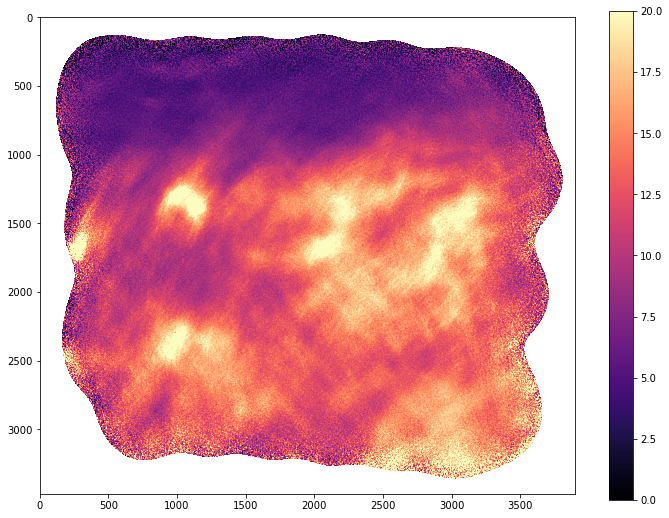

In [13]:
plt.imshow(np.flip(file[0].data[41,:,:], axis = 0), cmap = 'magma', vmin = 0, vmax = 20)
plt.colorbar()

In [14]:
im = fft(file[0].data[41,:,:])

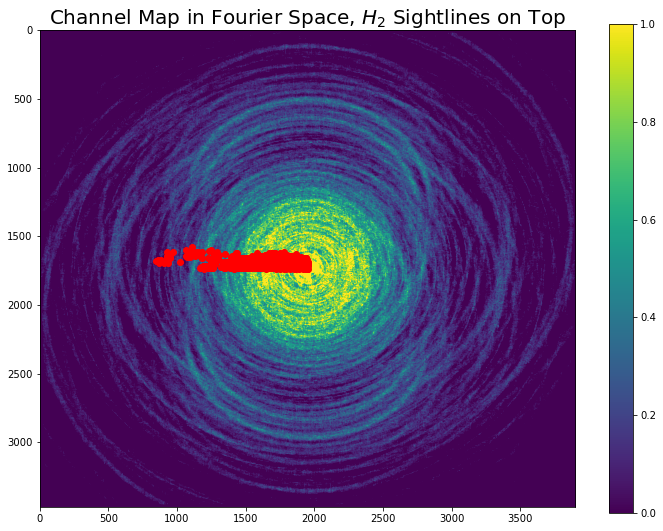

In [27]:
plt.imshow(np.abs(im), vmin = 0.00005, vmax = 0.0003)
plt.scatter(k_x, k_y, c = 'red')
plt.title('Channel Map in Fourier Space, $H_2$ Sightlines on Top', fontsize = 20)
plt.colorbar()

# REMOVING BORDER NOISE

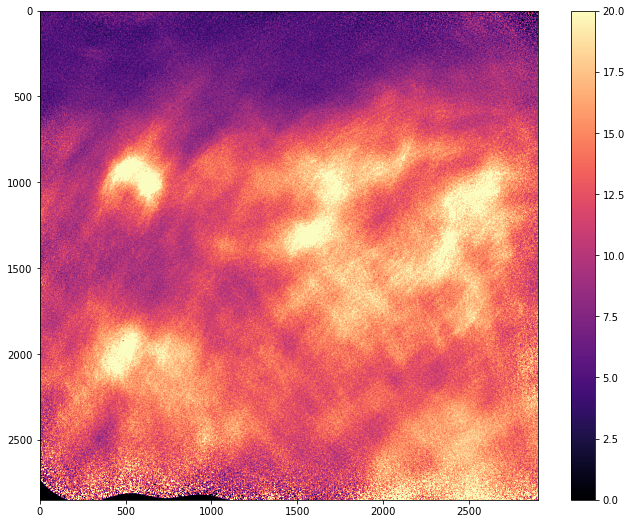

In [22]:
plt.imshow(np.flip(file[0].data[41,250:3100,500:3400], axis = 0), cmap = 'magma', vmin = 0, vmax = 20)
plt.colorbar()

In [25]:
im_nonoise = fft(file[0].data[41,250:3100,500:3400])

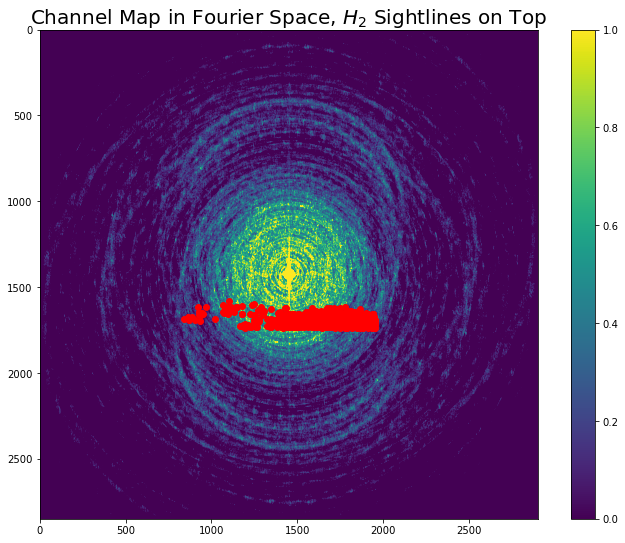

In [26]:
plt.imshow(np.abs(im_nonoise), vmin = 0.00005, vmax = 0.00025)
plt.scatter(k_x, k_y, c = 'red')
plt.title('Channel Map in Fourier Space, $H_2$ Sightlines on Top', fontsize = 20)
plt.colorbar()

Yeah that doesn't help these "spiral arms" either

# USING USM TO CORRESPOND TO SHORTEST BASELINE

In [34]:
# does the actual work of the USM

def process_usm(cc_sum, FWHM = 0.554):
    
    pix_len = file[0].header['CDELT2'] * 60 # ['CDELT2'] = pixel length in deg, multiply by 60 to convert to arcmin
    FWHM30_pix = FWHM / pix_len # want FWHM to be 0.554 arcmin (corresponding to shortest baseline), so convert to pixels
    sigma = FWHM30_pix / (2 * np.sqrt(2 * np.log(2))) # converts from FWHM to sigma, since Gaussian filter specified by sigma
    sum_smooth = gaussian_filter(cc_sum, sigma = sigma) # does smoothing using Gaussian filter
    
    sum_USM = cc_sum - sum_smooth
    
    return sum_USM


In [36]:
# main function

def usm(v_indx, FWHM = 0.554, maskb = False):
    
    file = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/MW_foreground_SMC.fits') # reset
    cc_sum = file[0].data[v_indx, :, :]
    sum_USM = process_usm(cc_sum)
    sum_USM[np.where(sum_USM < 0.)] = 0. # at end so negative noise cancels out with positive noise
    file = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/MW_foreground_SMC.fits') # reset
    
    return sum_USM
   

In [40]:
im_usm = usm(41)

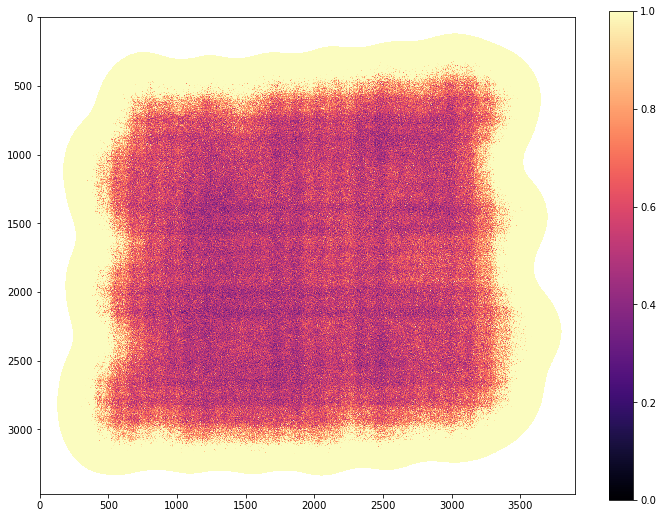

In [43]:
plt.imshow(im_usm, cmap = 'magma', vmax = 1)
plt.colorbar()

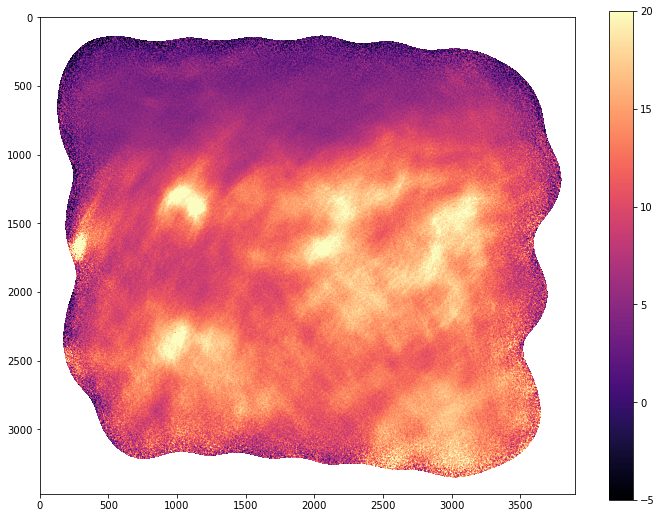

In [44]:
plt.imshow(np.flip((file[0].data[41,:,:] - im_usm), axis = 0), cmap = 'magma', vmin = -5, vmax = 20)
plt.colorbar()

Text(0.5, 1.0, 'GASKAP Data w/h Cuts')

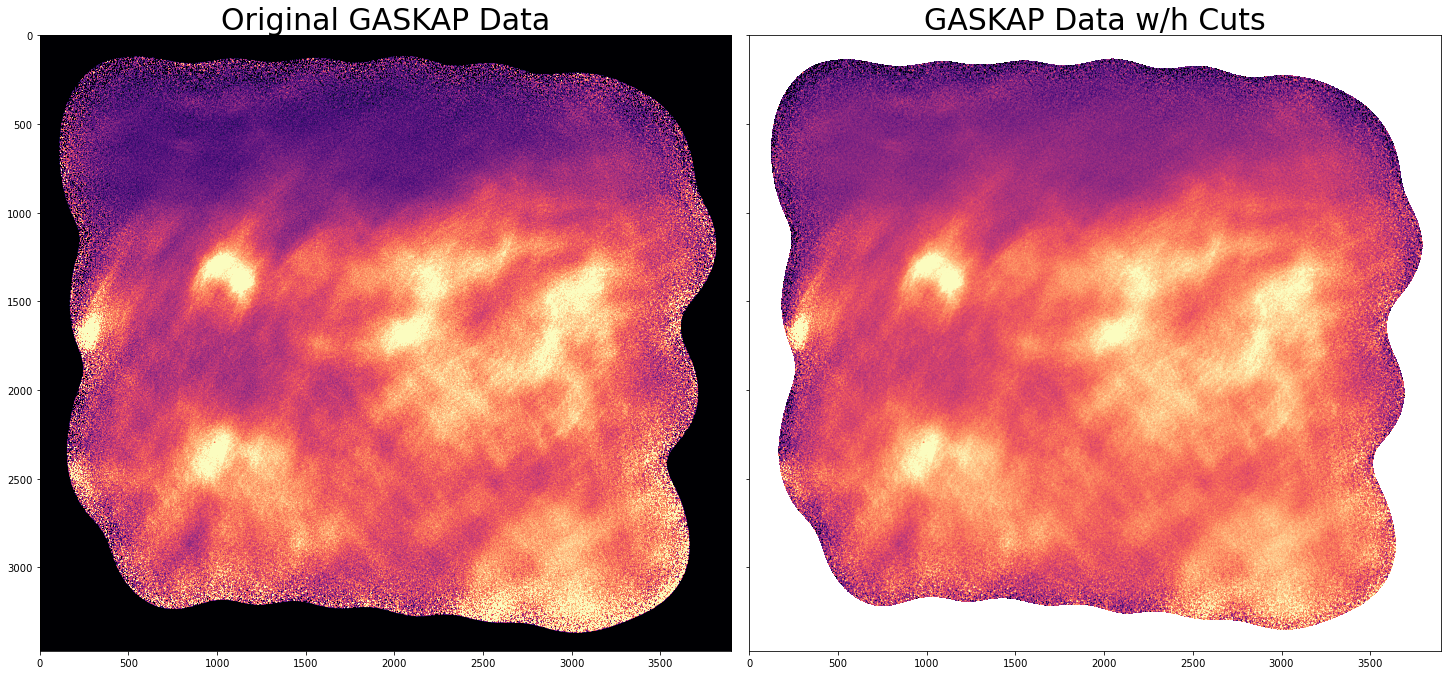

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, constrained_layout = True, figsize = (20, 40))
ax1.imshow(np.flip(file[0].data[41,:,:], axis = 0), cmap = 'magma', vmin = 0, vmax = 20)
ax2.imshow(np.flip((file[0].data[41,:,:] - im_usm), axis = 0), cmap = 'magma', vmin = -5, vmax = 20)
ax1.set_title('Original GASKAP Data', fontsize = 30)
ax2.set_title('GASKAP Data w/h Cuts', fontsize = 30)

In [46]:
im_usm_fft = fft(im_usm)

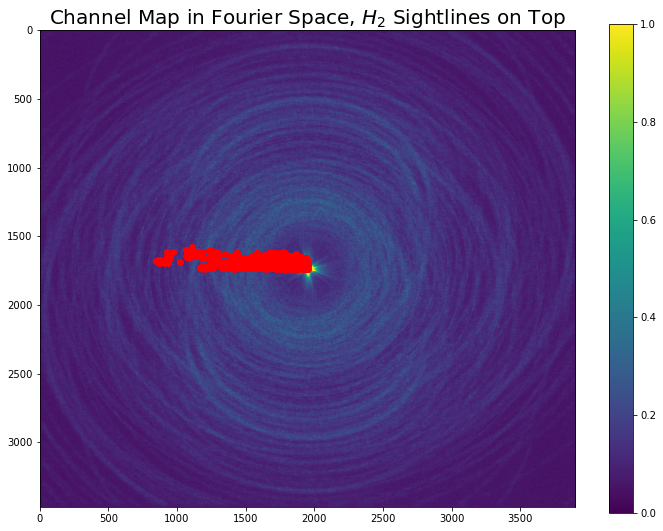

In [47]:
plt.imshow(np.abs(im_usm_fft), vmin = 0.000001, vmax = 0.0015)
plt.scatter(k_x, k_y, c = 'red')
plt.title('Channel Map in Fourier Space, $H_2$ Sightlines on Top', fontsize = 20)
plt.colorbar()

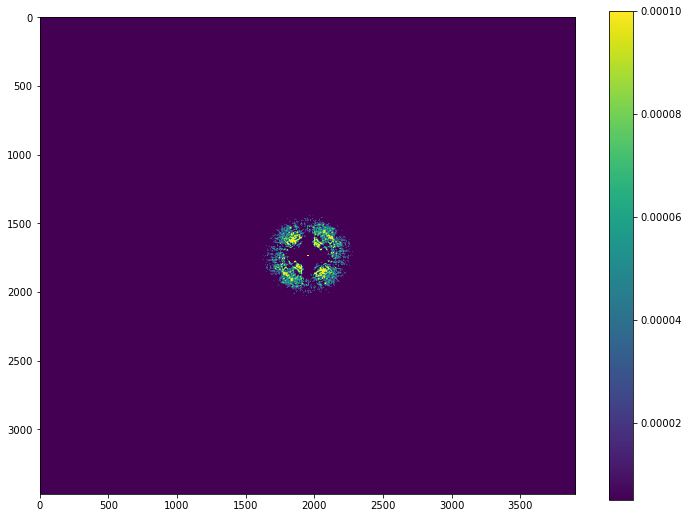

In [50]:
plt.imshow(np.abs(im) - np.abs(im_usm_fft), vmin = 0.000005, vmax = 0.0001)
plt.colorbar()

Zooming in . . .

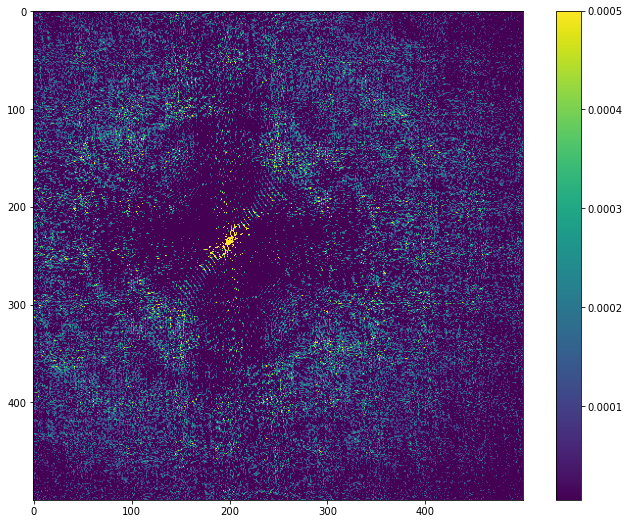

In [53]:
plt.imshow((np.abs(im) - np.abs(im_usm_fft))[1500:2000, 1750:2250], vmin = 0.000005, vmax = 0.0005)
plt.colorbar()

Lots of noise has disappeared!

# USING HI4PI DATA

In [28]:
HI4PI = fits.open('/Users/FRANNYPACK/Downloads/grind!/research/Data/SMC_HI4PI/mosaic_cube.fits')

In [29]:
# FOR HI4PI

def v_indx(v_val): # v_val must be in m/s
    return int((v_val - -51220.42315311206) / (1288.21496912415))

In [30]:
v_indx(-0.133 * 10 ** 3)

39

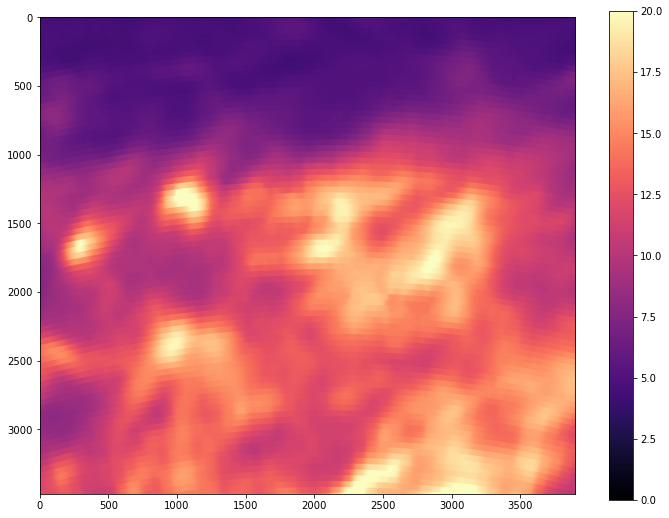

In [31]:
plt.imshow(np.flip(HI4PI[0].data[39,:,:], axis = 0), cmap = 'magma', vmin = 0, vmax = 20)
plt.colorbar()

In [32]:
im_HI4PI = fft(HI4PI[0].data[39,:,:])

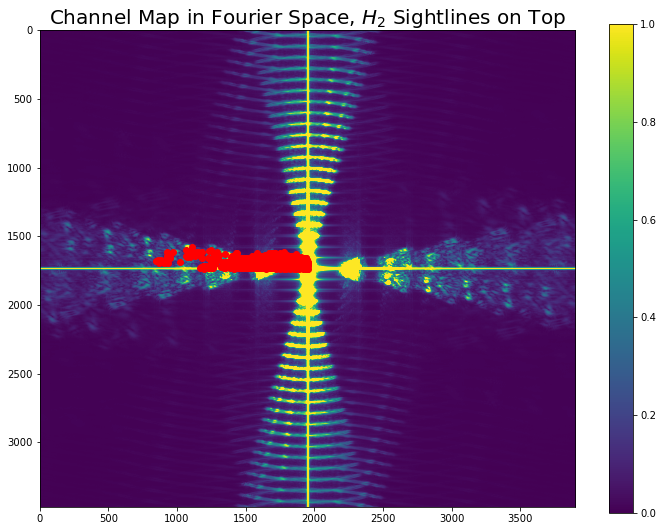

In [33]:
plt.imshow(np.abs(im_HI4PI), vmax = 0.000005)
plt.scatter(k_x, k_y, c = 'red')
plt.title('Channel Map in Fourier Space, $H_2$ Sightlines on Top', fontsize = 20)
plt.colorbar()

Yeah this data has its own kind of artifacts - spiral arms = GASKAP-y artifacts